In [1]:
# imports some utilities ...

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_all.csv', index_col=[0])

## Let's vizualisate that

In [3]:
df.head()

,111,112,121,122,123,124,131,133,141,142,...,mrl_lead,mrl_cadmium,mrl_arsenic,mrl_copper,has_mercury,hm_cat_label,mrl_fungicides,mrl_insecticides,mrl_herbicides,pesti_cat_label
0,0.0,1442.780424,3.587087e+05,0.000000,0.0,0.0,0.000000,0.0,0.0,174.244001,...,0,0,0,0,0,0,0,0,1,1
1,0.0,0.000000,0.000000e+00,700.801763,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2412.961618,4.053755e+06,523.436355,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.000000,7.907522e+02,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,1
4,0.0,0.000000,2.918492e+02,0.000000,0.0,0.0,57.312693,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,3


In [4]:
df.shape

(57, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   111               57 non-null     float64
 1   112               57 non-null     float64
 2   121               57 non-null     float64
 3   122               57 non-null     float64
 4   123               57 non-null     float64
 5   124               57 non-null     float64
 6   131               57 non-null     float64
 7   133               57 non-null     float64
 8   141               57 non-null     float64
 9   142               57 non-null     float64
 10  211               57 non-null     float64
 11  221               57 non-null     float64
 12  231               57 non-null     float64
 13  242               57 non-null     float64
 14  243               57 non-null     float64
 15  311               57 non-null     float64
 16  312               57 non-null     float64
 17 

In [6]:
df.describe(include=['int64', 'float64'])
# df.describe(include=['int64', 'float64']).transpose()

,111,112,121,122,123,124,131,133,141,142,...,mrl_lead,mrl_cadmium,mrl_arsenic,mrl_copper,has_mercury,hm_cat_label,mrl_fungicides,mrl_insecticides,mrl_herbicides,pesti_cat_label
count,57.000000,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,5.700000e+01,57.000000,57.000000,5.700000e+01,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,389.289932,4.384149e+05,1.615709e+05,198.756957,35.163690,27.331065,2.599861e+04,9.194964,86.733773,2.762059e+04,...,0.017544,0.070175,0.017544,0.017544,0.175439,0.631579,0.614035,0.140351,0.087719,2.210526
std,2049.678099,1.262078e+06,7.086092e+05,479.722186,239.816443,206.345017,1.583911e+05,49.116026,397.987523,2.066265e+05,...,0.132453,0.257713,0.132453,0.132453,0.383723,1.262531,0.491150,0.350438,0.285401,1.760041
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.225678e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.029865e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,0.000000,7.328884e+03,5.337917e+02,65.325567,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000
max,15107.362039,5.206697e+06,4.053755e+06,2509.438121,1802.939005,1557.870715,1.160708e+06,338.605936,2481.457626,1.560227e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,6.000000


In [7]:
df['111'].value_counts()

0.000000        51
391.077976       1
209.227976       1
3098.057557      1
1967.704980      1
15107.362039     1
1416.095618      1
Name: 111, dtype: int64

In [8]:
df['412'].value_counts()

0.000000e+00    54
1.809062e+06     1
8.187923e+02     1
2.574868e+03     1
Name: 412, dtype: int64

<AxesSubplot:>

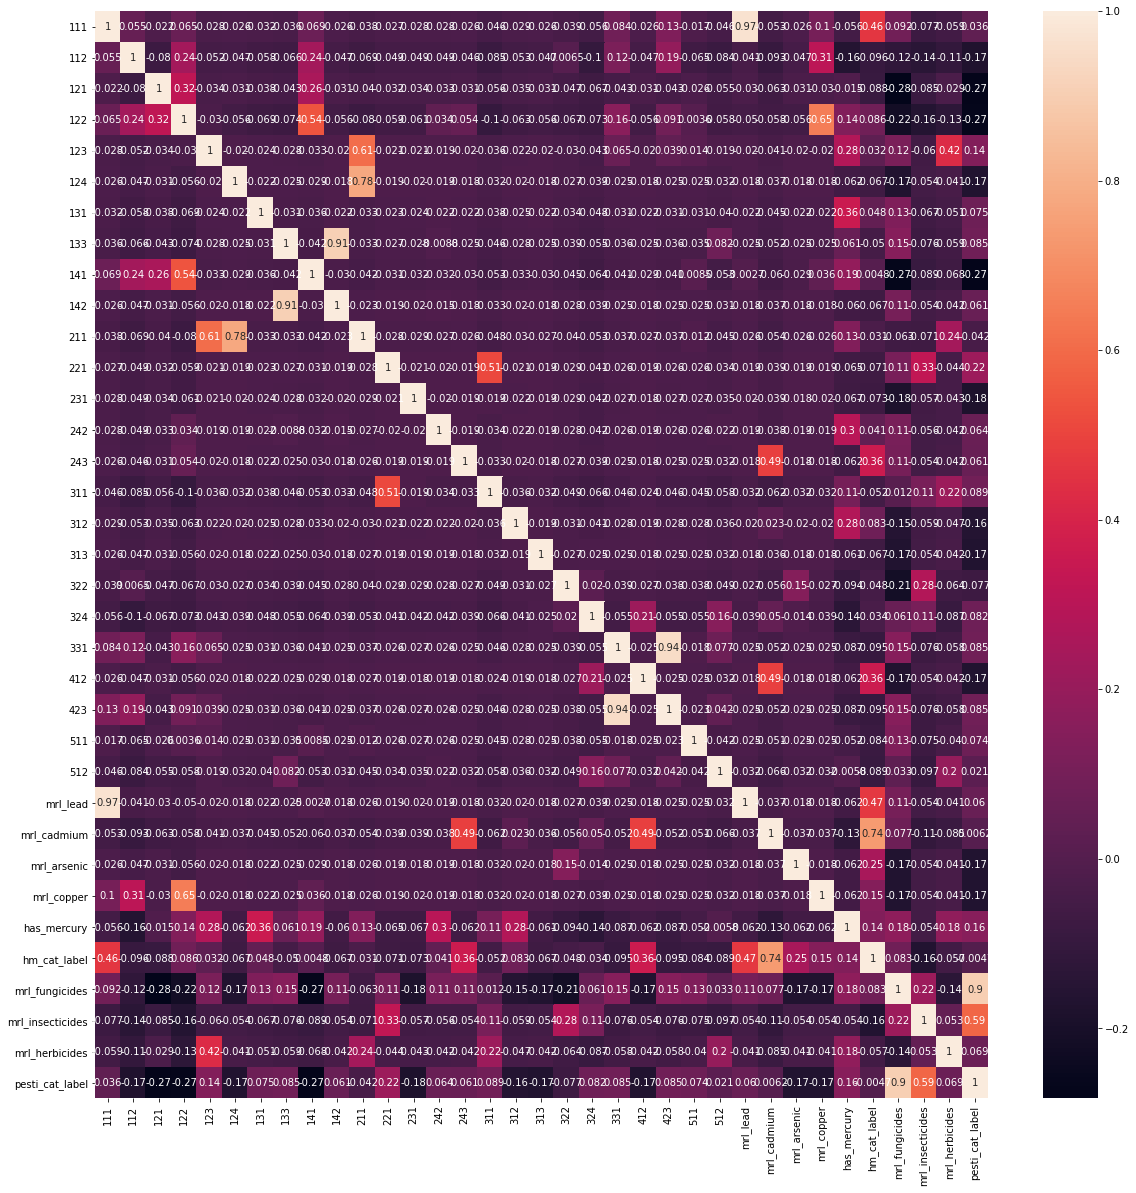

In [9]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,)

<AxesSubplot:>

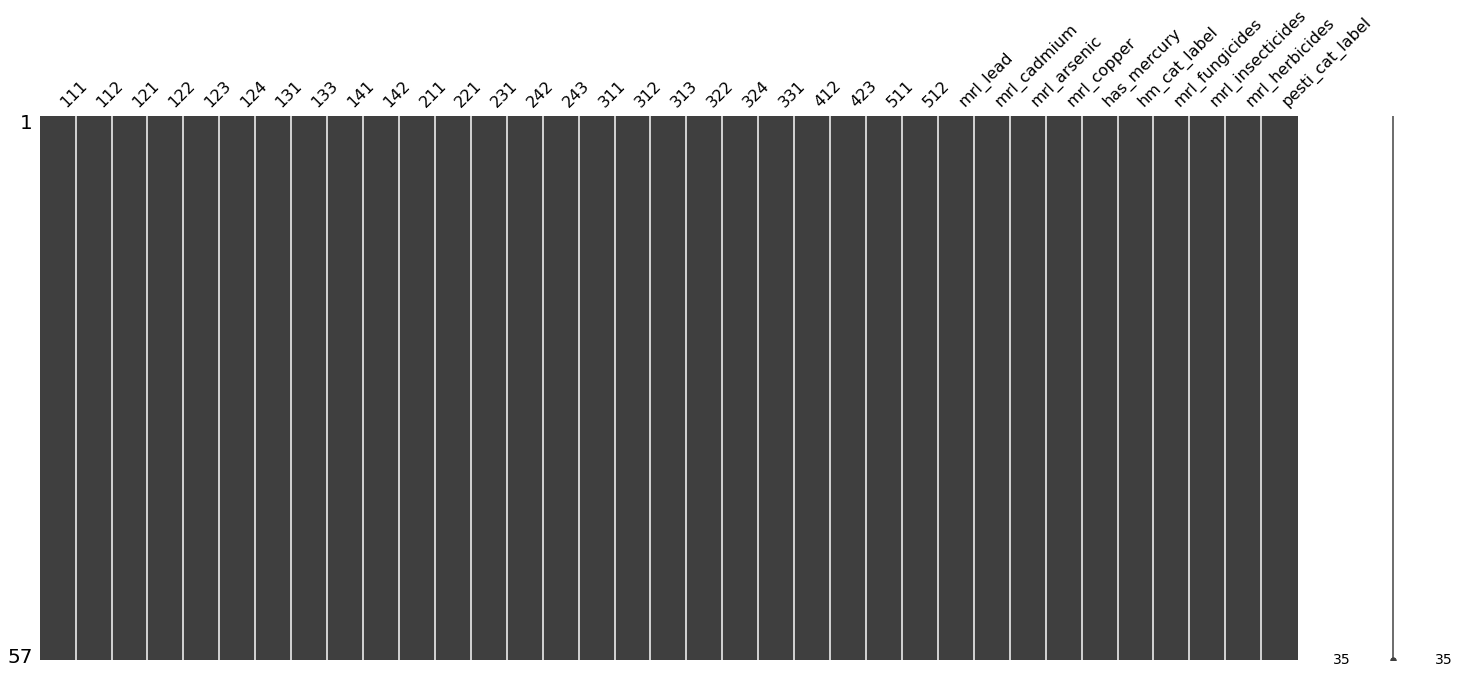

In [10]:
import missingno as msno
%matplotlib inline

msno.matrix(df)

**On peux constater un cruel manque de données et un certains déséquilibre entre les valeurs cibles**( lmr_fungicides, lmr_insecticides, lmr_herbicides )

## Cleaning & spliting the dataset

In [11]:
df.columns

Index(['111', '112', '121', '122', '123', '124', '131', '133', '141', '142',
       '211', '221', '231', '242', '243', '311', '312', '313', '322', '324',
       '331', '412', '423', '511', '512', 'mrl_lead', 'mrl_cadmium',
       'mrl_arsenic', 'mrl_copper', 'has_mercury', 'hm_cat_label',
       'mrl_fungicides', 'mrl_insecticides', 'mrl_herbicides',
       'pesti_cat_label'],
      dtype='object')

In [12]:
X = df.drop(['mrl_lead', 'mrl_cadmium',
       'mrl_arsenic', 'mrl_copper', 'has_mercury', 'hm_cat_label',
       'mrl_fungicides', 'mrl_insecticides', 'mrl_herbicides', 'pesti_cat_label'], axis=1)

In [13]:
X.head()

,111,112,121,122,123,124,131,133,141,142,...,311,312,313,322,324,331,412,423,511,512
0,0.0,1442.780424,3.587087e+05,0.000000,0.0,0.0,0.000000,0.0,0.0,174.244001,...,352.189664,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.000000e+00,700.801763,0.0,0.0,0.000000,0.0,0.0,0.000000,...,24001.488078,0.00000,0.0,0.0,926.217913,0.0,0.0,0.0,0.0,0.000000
2,0.0,2412.961618,4.053755e+06,523.436355,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,7.907522e+02,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,3967.324372,0.00000,0.0,0.0,16.596285,0.0,0.0,0.0,0.0,463.344615
4,0.0,0.000000,2.918492e+02,0.000000,0.0,0.0,57.312693,0.0,0.0,0.000000,...,554.379851,1394.29963,0.0,0.0,1037.166322,0.0,0.0,0.0,0.0,631.183641


### In this note book we are going to make one different model for each target with binary crossentropy

In [14]:
y = df[['has_mercury']]
y.head()

,has_mercury
0,0
1,0
2,0
3,0
4,0


In [15]:
y.value_counts()

has_mercury
0              47
1              10
dtype: int64

### Splitting

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [17]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# with tf.device('/GPU:0'):

Num GPUs Available:  1


## CONFIG

In [18]:
INPUT_SIZE = X_train.shape[1]
EPOCHS = 100
LEARNING_RATE = 0.0001
OUTPUT_SIZE = 1
BATCH_SIZE = 1

In [19]:
print("INPUT_SIZE:", INPUT_SIZE)
print("EPOCHS:", EPOCHS)
print("LEARNING_RATE:", LEARNING_RATE)
print("OUTPUT_SIZE:", OUTPUT_SIZE)
print("BATCH_SIZE:", BATCH_SIZE)

INPUT_SIZE: 25
EPOCHS: 100
LEARNING_RATE: 0.0001
OUTPUT_SIZE: 1
BATCH_SIZE: 1


## TRAINING

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train[0]

array([9.37354658e-02, 5.68433792e-04, 3.71792462e-01, 7.84147971e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.18333510e-02,
       0.00000000e+00])

In [21]:
X_train.shape

(45, 25)

In [22]:
y_train.shape

(45, 1)

In [23]:
y_test.shape

(12, 1)

In [24]:
X_test.shape

(12, 25)

### Using Deep Learning

In [25]:
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(INPUT_SIZE,)))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(OUTPUT_SIZE, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13312     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 358,273
Trainable params: 358,273
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [27]:
with tf.device('/GPU:0'):

    history = model.fit(X_train, y_train, epochs=EPOCHS, 
                        validation_data=(X_test, y_test), batch_size=BATCH_SIZE)

Epoch 1/100
45/45 [==============================] - 3s 37ms/step - loss: 0.6812 - accuracy: 0.7147 - recall: 0.5051 - auc: 0.4262 - val_loss: 5.3585 - val_accuracy: 0.7500 - val_recall: 0.0000e+00 - val_auc: 0.1667
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 0.6161 - accuracy: 0.8935 - recall: 0.0000e+00 - auc: 0.4956 - val_loss: 14.1896 - val_accuracy: 0.7500 - val_recall: 0.0000e+00 - val_auc: 0.1481
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 0.5290 - accuracy: 0.8494 - recall: 0.0000e+00 - auc: 0.5884 - val_loss: 30.0650 - val_accuracy: 0.7500 - val_recall: 0.0000e+00 - val_auc: 0.1481
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 0.5123 - accuracy: 0.7860 - recall: 0.0000e+00 - auc: 0.6675 - val_loss: 38.9916 - val_accuracy: 0.7500 - val_recall: 0.0000e+00 - val_auc: 0.1481
Epoch 5/100
45/45 [==============================] - 0s 8ms/step - loss: 0.3328 - accuracy: 0.9103 - recall: 0.0000e+00 - au

45/45 [==============================] - 0s 9ms/step - loss: 0.0241 - accuracy: 0.9980 - recall: 0.6398 - auc: 0.6520 - val_loss: 153.0158 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.5556
Epoch 40/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0215 - accuracy: 0.9970 - recall: 0.6977 - auc: 0.7174 - val_loss: 141.4227 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.5000
Epoch 41/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0644 - accuracy: 0.9775 - recall: 0.8119 - auc: 0.9348 - val_loss: 137.3410 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.4630
Epoch 42/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0388 - accuracy: 0.9947 - recall: 0.9392 - auc: 0.9772 - val_loss: 146.7149 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.5370
Epoch 43/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9886 - recall: 0.8504 - auc: 0.9109 - val_loss: 143.2010 - val

45/45 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 1.0000 - recall: 1.0000 - auc: 0.9783 - val_loss: 331.7955 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.6296
Epoch 78/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 1.0000 - recall: 0.8261 - auc: 0.8261 - val_loss: 340.5540 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.6296
Epoch 79/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 1.0000 - recall: 0.9783 - auc: 0.9783 - val_loss: 335.2882 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.5926
Epoch 80/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 1.0000 - recall: 0.7609 - auc: 0.7609 - val_loss: 343.1967 - val_accuracy: 0.7500 - val_recall: 0.3333 - val_auc: 0.5926
Epoch 81/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 1.0000 - recall: 0.8261 - auc: 0.8261 - val_loss: 353.3899 - val

1/1 [==============================] - 0s 387ms/step - loss: 424.6375 - accuracy: 0.7500 - recall: 0.3333 - auc: 0.5926


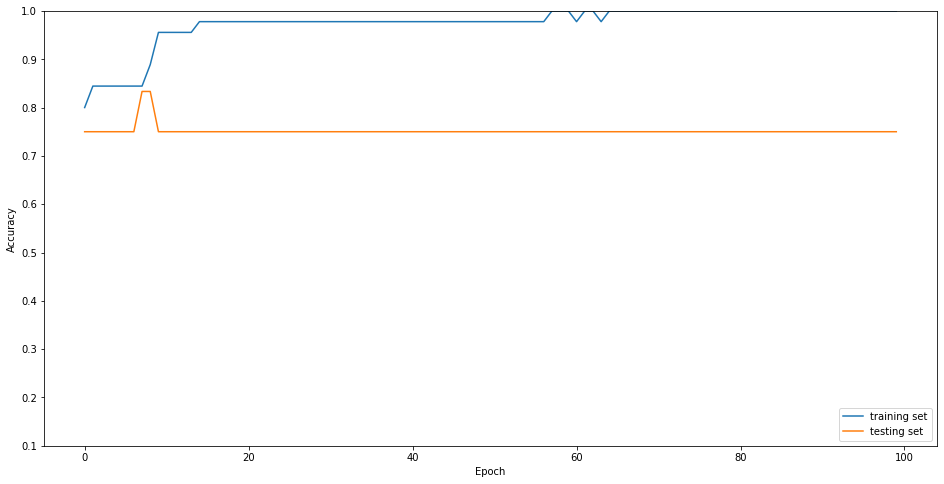

In [28]:
plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc, test_rec, test_auc = model.evaluate(X_test,  y_test)

1/1 [==============================] - 0s 29ms/step - loss: 424.6375 - accuracy: 0.7500 - recall: 0.3333 - auc: 0.5926


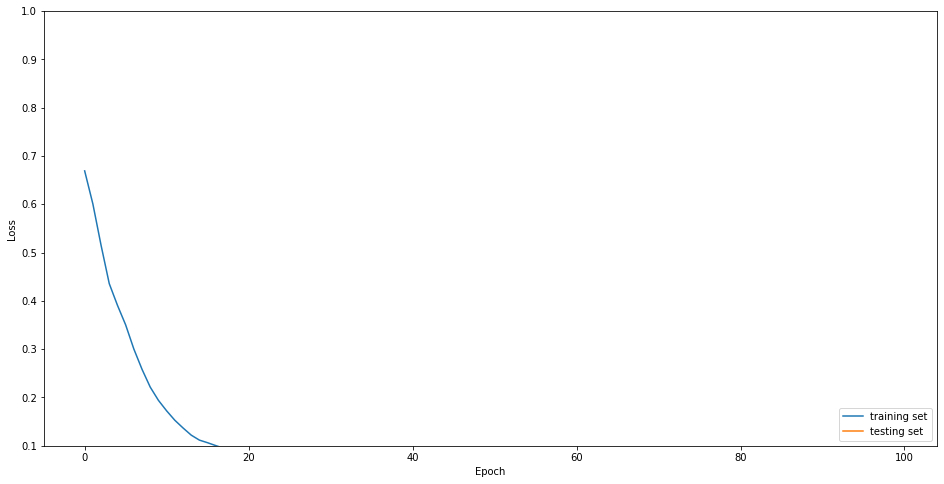

In [29]:

plt.figure(figsize=(16,8))

plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label = 'testing set')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc, test_rec, test_auc = model.evaluate(X_test,  y_test)

1/1 [==============================] - 0s 21ms/step - loss: 424.6375 - accuracy: 0.7500 - recall: 0.3333 - auc: 0.5926


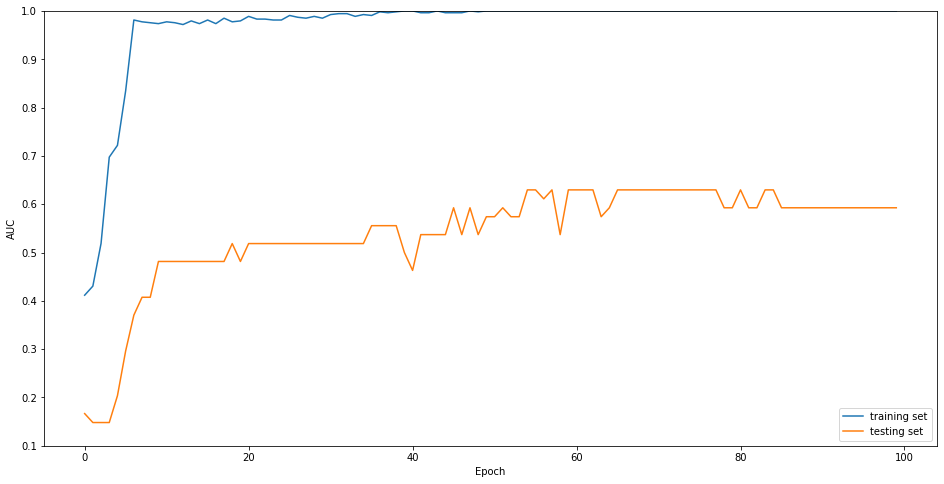

In [30]:

plt.figure(figsize=(16,8))

plt.plot(history.history['auc'], label='training set')
plt.plot(history.history['val_auc'], label = 'testing set')


plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc, test_rec, test_auc = model.evaluate(X_test,  y_test)

In [37]:
model.save('binary_model_mercury.h5')

In [32]:
y_pred = model.predict(X_test)
y_pred

array([[5.6526147e-12],
       [1.0000000e+00],
       [0.0000000e+00],
       [7.2861224e-11],
       [0.0000000e+00],
       [5.2998475e-06],
       [0.0000000e+00],
       [1.0601362e-05],
       [0.0000000e+00],
       [1.2302865e-02],
       [2.0837374e-19],
       [8.5578281e-01]], dtype=float32)

In [33]:
y_pred = y_pred.round(1).astype(int)
y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [34]:
# labels

In [35]:
# from tensorflow import keras
# model = keras.models.load_model('biomodel.h5')

Confusion Matrix


<AxesSubplot:>

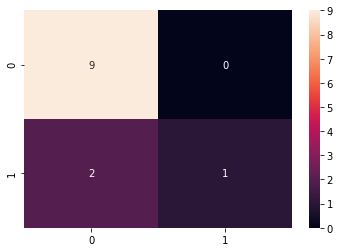

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print('Confusion Matrix')
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='g')